In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.font_manager as fm
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.interpolate import griddata
from skimage import measure
import cv2
from tqdm import tqdm
import h5py
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import scipy as sp

C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
plb.rcParams["font.family"] = "malgun Gothic"
plb.rcParams["font.size"]=12
plb.rcParams["figure.figsize"]=(14,4)
mpl.rcParams['axes.unicode_minus']=False

In [7]:
for_heatmaps = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/A-B,C-D, 높이_10cm,LR,RL,CW,CCW/Total_datas_merged_8features/Total_datas + labels_merged_8features.csv',names=['a-b','c-d','(a-b)1+(a-b)2','(c-d)1+(c-d)2','(a-b)1-(a-b)2','(c-d)1-(c-d)2','(a-b)2-(a-b)1','(c-d)2-(c-d)1','gesture'])
for_heatmaps

,a-b,c-d,(a-b)1+(a-b)2,(c-d)1+(c-d)2,(a-b)1-(a-b)2,(c-d)1-(c-d)2,(a-b)2-(a-b)1,(c-d)2-(c-d)1,gesture
0,-0.006465,0.065312,-0.013075,0.130905,0.000145,-0.000281,-0.000303,0.000203,0
1,-0.006610,0.065593,-0.013222,0.131522,0.000002,-0.000336,-0.000145,0.000281,0
2,-0.006612,0.065929,-0.013099,0.132229,-0.000125,-0.000371,-0.000002,0.000336,0
3,-0.006487,0.066300,-0.012773,0.132986,-0.000201,-0.000386,0.000125,0.000371,0
4,-0.006286,0.066686,-0.012422,0.133755,-0.000150,-0.000383,0.000201,0.000386,0
...,...,...,...,...,...,...,...,...,...
373387,0.096765,0.107188,0.194179,0.213953,-0.000649,0.000423,0.000686,-0.000098,3
373388,0.097414,0.106765,0.195417,0.212798,-0.000589,0.000732,0.000649,-0.000423,3
373389,0.098003,0.106033,0.196515,0.211148,-0.000509,0.000918,0.000589,-0.000732,3
373390,0.098512,0.105115,0.197454,0.209446,-0.000430,0.000784,0.000509,-0.000918,3


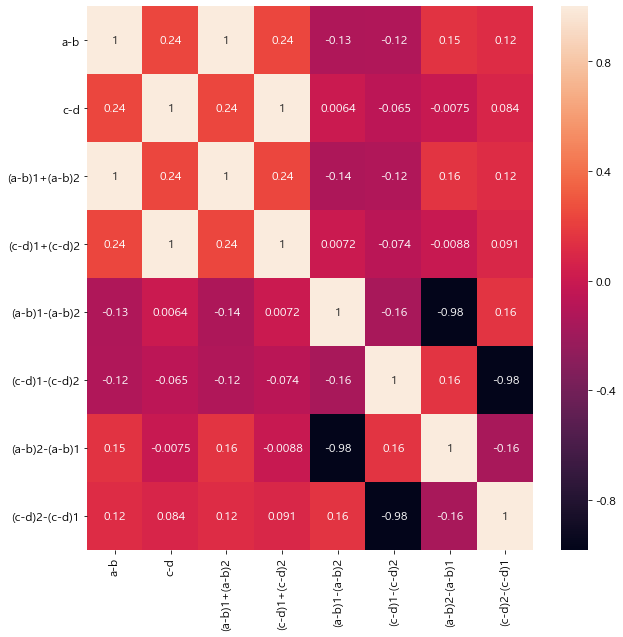

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(for_heatmaps.corr(method='spearman'),annot=True)

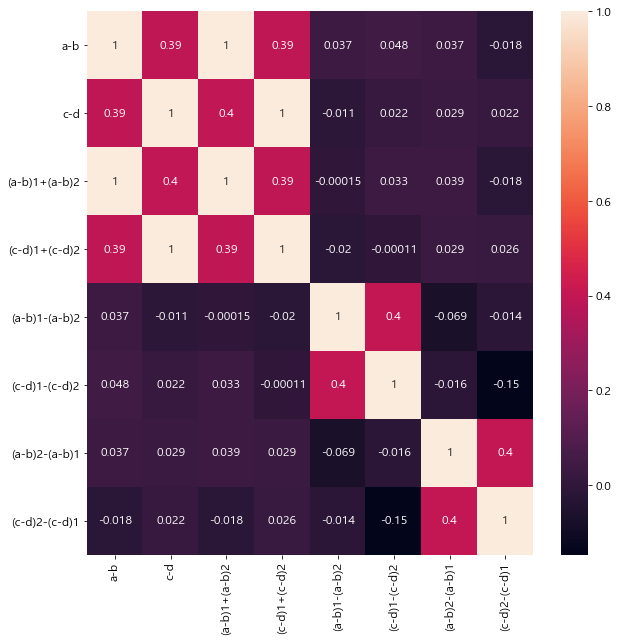

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(for_heatmaps.corr(method='pearson'),annot=True)

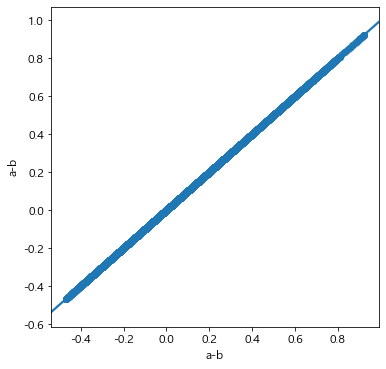

In [28]:
plt.figure(figsize=(20,20))
#for i in range(1,9):
ax = plt.subplot(4, 4, i)
sns.regplot(for_heatmaps.iloc[1:,0],for_heatmaps.iloc[1:,0])

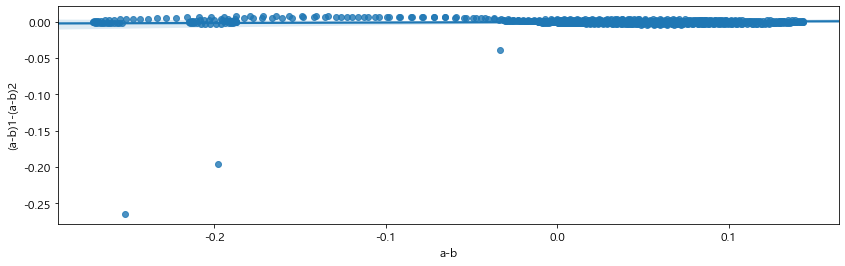

In [44]:
sns.regplot(for_heatmaps.iloc[1:1000,0], for_heatmaps.iloc[1:1000,4])

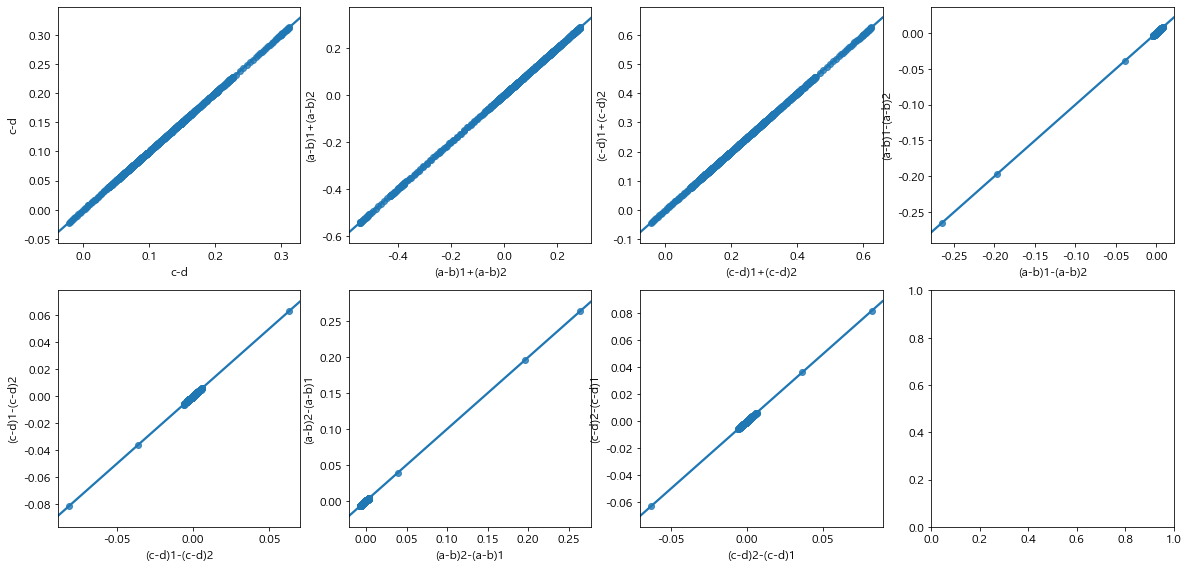

In [6]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    try:
        ax = plt.subplot(4, 4, i)
        sns.regplot(for_heatmaps.iloc[1:1000,i],for_heatmaps.iloc[1:1000,i])
        
    except:
        pass
    


C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


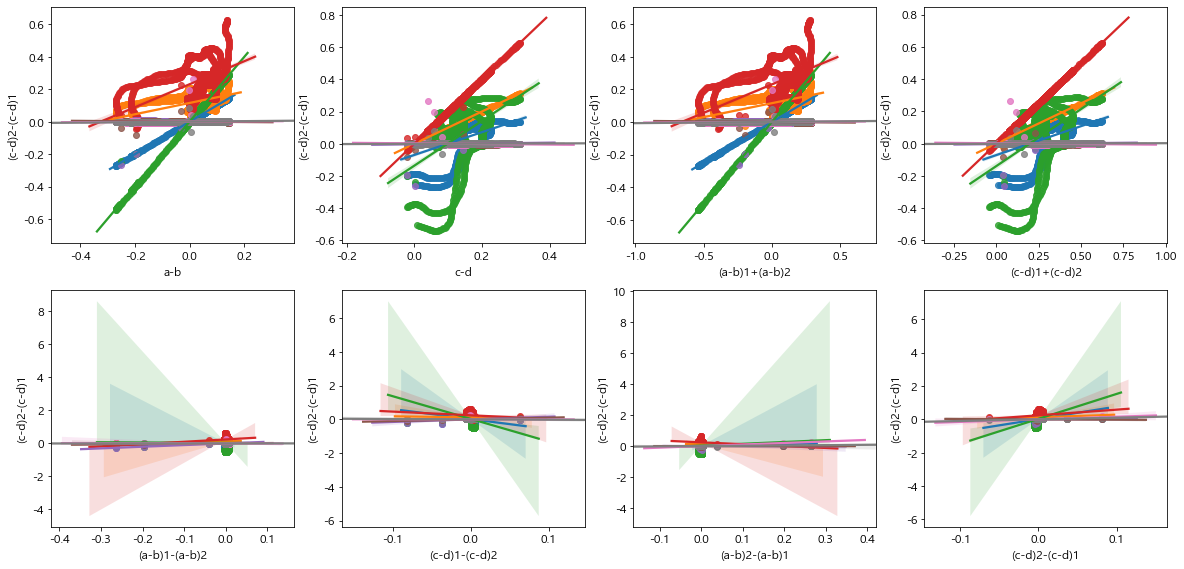

In [9]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    for j in range(1,9):
        try:
            ax = plt.subplot(4, 4, i)
            sns.regplot(for_heatmaps.iloc[1:1000,i-1],for_heatmaps.iloc[1:1000,j-1])

        except:
            pass


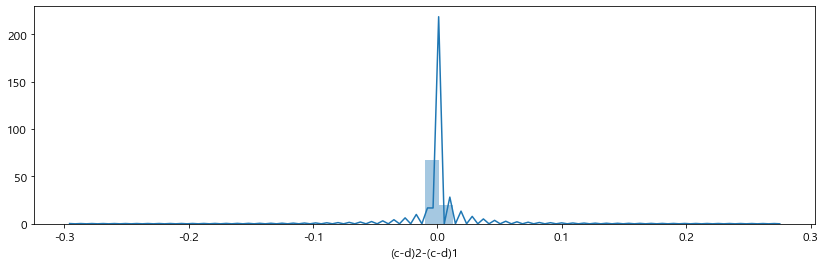

In [49]:
sns.distplot(np.log1p(for_heatmaps.iloc[:,7]))
#0값단이 많다는 소리 

C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


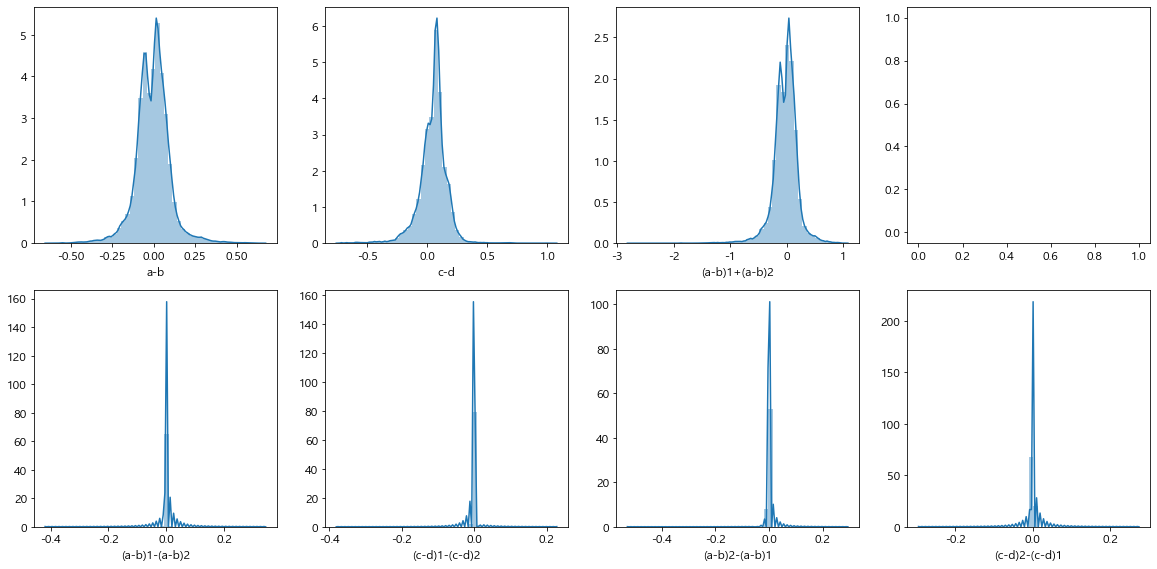

In [21]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    try:
        ax = plt.subplot(4, 4, i)
        sns.distplot(np.log1p(for_heatmaps.iloc[:,i-1]))
    except:
        pass

C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


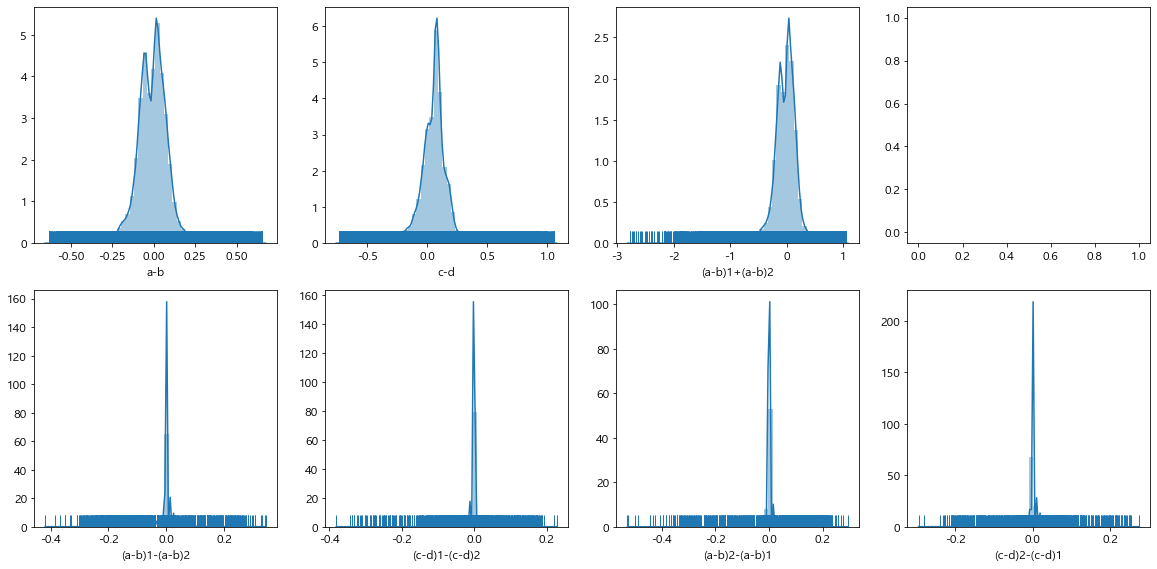

In [19]:
plt.figure(figsize=(20,20))
for i in range(1,9):
    try:
        ax = plt.subplot(4, 4, i)
        sns.distplot(np.log1p(for_heatmaps.iloc[:,i-1]),rug=True)
    except:
        pass

In [85]:
for_heatmaps.isnull().any()

a-b              False
c-d              False
(a-b)1+(a-b)2    False
(c-d)1+(c-d)2    False
(a-b)1-(a-b)2    False
(c-d)1-(c-d)2    False
(a-b)2-(a-b)1    False
(c-d)2-(c-d)1    False
dtype: bool

In [ ]:
normal_dist = (1 / np.sqrt(2 * np.pi)) * np.exp(- x ** 2 / 2 )

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(x, y)                       
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()                           # 플롯 보이기

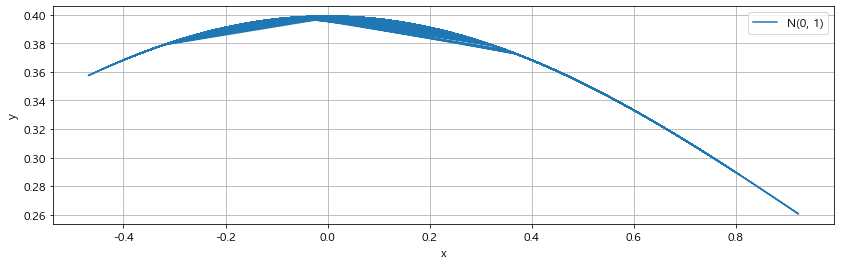

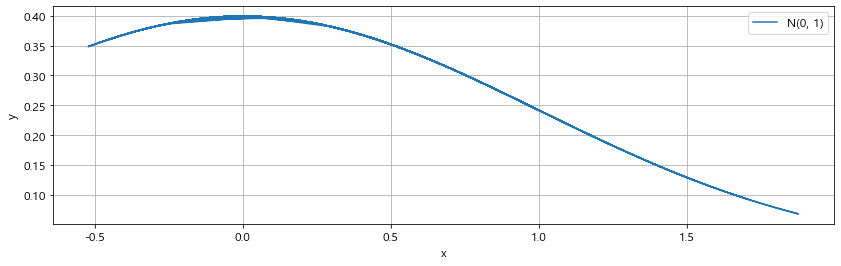

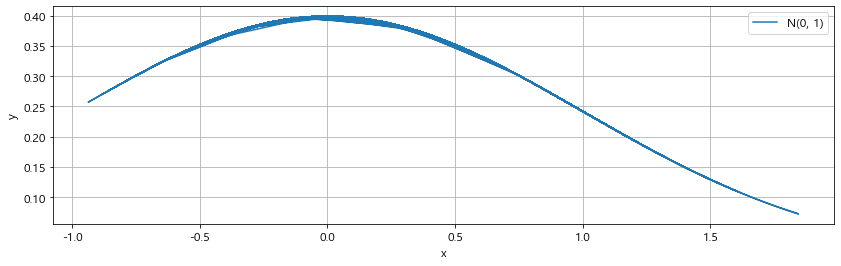

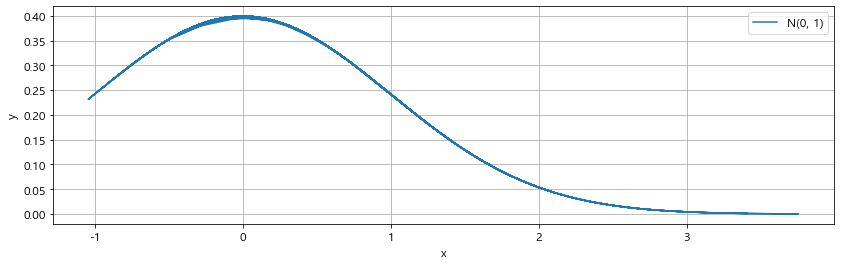

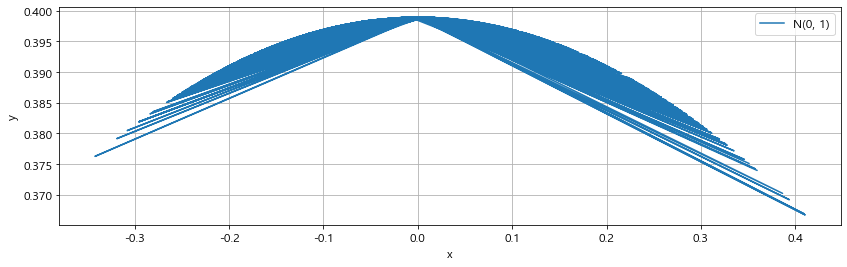

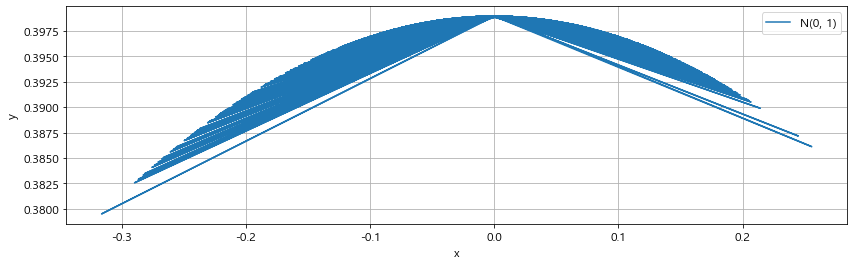

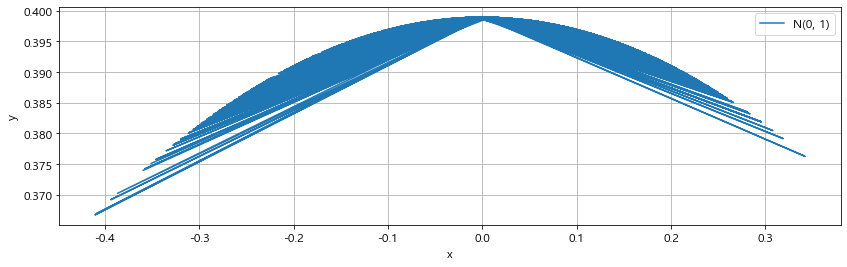

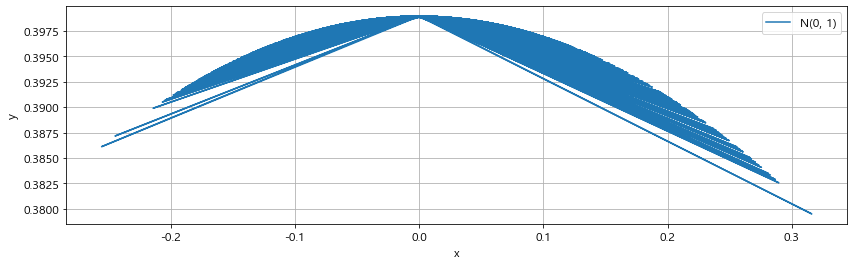

In [14]:
#plt.figure(figsize=(20,20))
for i in range(1,9):
    try:
        normal_dist = (1 / np.sqrt(2 * np.pi)) * np.exp(- for_heatmaps.iloc[:,i-1] ** 2 / 2 )
        plt.plot(for_heatmaps.iloc[:,i-1],normal_dist)
        plt.xlabel("x")                      # x축 레이블 지정
        plt.ylabel("y")                      # y축 레이블 지정
        plt.grid()                           # 플롯에 격자 보이기
        plt.legend(["N(0, 1)"])              # 범례 표시
        plt.show()                           # 플롯 보이기
    except:
        pass

In [15]:
import scipy as sp
import scipy.stats
rv = sp.stats.norm()

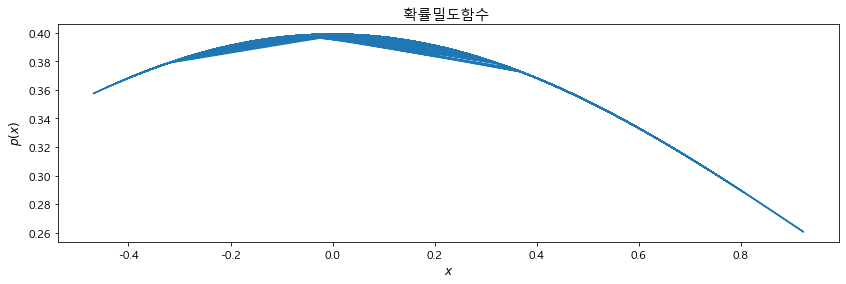

In [17]:
pdf = rv.pdf(for_heatmaps.iloc[:,0])
plt.plot(for_heatmaps.iloc[:,0], pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

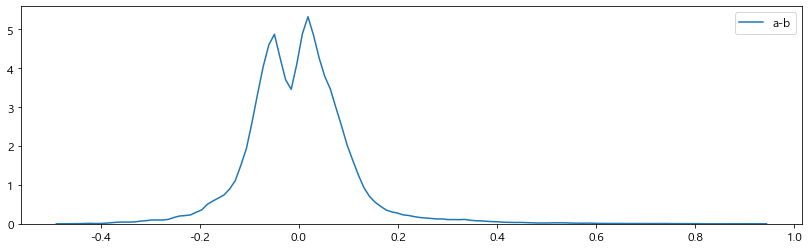

In [18]:
sns.kdeplot(for_heatmaps.iloc[:,0])
plt.show()

In [8]:
for i in range(1,9):
    print("Round",i," 평균     : ",np.mean(for_heatmaps.iloc[:,i-1])) # 평균
    print("Round",i," 분산     : ",np.var(for_heatmaps.iloc[:,i-1])) # 분산
    print("Round",i," L-R 분산     : ",np.var(for_heatmaps.iloc[:55897,i-1])) # 분산
    print("Round",i," R-L 분산     : ",np.var(for_heatmaps.iloc[55897:134995,i-1])) # 분산
    print("Round",i," CW  분산     : ",np.var(for_heatmaps.iloc[134995:232894,i-1])) # 분산
    print("Round",i," CCW 분산     : ",np.var(for_heatmaps.iloc[232894:,i-1])) # 분산
   
    print("Round",i," 표준편차 : ",np.std(for_heatmaps.iloc[:,i-1]),"\n\n") # 표준편차





Round 1  평균     :  3.311055723745508e-05
Round 1  분산     :  0.010951180263408815
Round 1  L-R 분산     :  0.010285827769445475
Round 1  R-L 분산     :  0.028769846314365636
Round 1  CW  분산     :  0.00551601192168243
Round 1  CCW 분산     :  0.0046288850933686315
Round 1  표준편차 :  0.10464788704703414 


Round 2  평균     :  0.056220794657142886
Round 2  분산     :  0.01499786233921553
Round 2  L-R 분산     :  0.00787862371778184
Round 2  R-L 분산     :  0.03467701844974572
Round 2  CW  분산     :  0.0035784170250692466
Round 2  CCW 분산     :  0.012614527063785687
Round 2  표준편차 :  0.12246575986460677 


Round 3  평균     :  6.548264123494686e-05
Round 3  분산     :  0.04374617232598964
Round 3  L-R 분산     :  0.04101601344307359
Round 3  R-L 분산     :  0.11496320454043164
Round 3  CW  분산     :  0.022020733395760602
Round 3  CCW 분산     :  0.01850609944919466
Round 3  표준편차 :  0.20915585654241106 


Round 4  평균     :  0.11244121322427911
Round 4  분산     :  0.05996221943204989
Round 4  L-R 분산     :  0.0314800040428

In [8]:
for i in range(1,9):
    print("Round",i," 평균     : ",np.mean(for_heatmaps.iloc[:,i-1])) # 평균
    print("Round",i," 분산     : ",np.var(for_heatmaps.iloc[:,i-1])) # 분산
    print("Round",i," 표준편차 : ",np.std(for_heatmaps.iloc[:,i-1]),"\n\n") # 표준편차

Round 1  평균     :  3.311055723745508e-05
Round 1  분산     :  0.010951180263408815
Round 1  표준편차 :  0.10464788704703414 


Round 2  평균     :  0.056220794657142886
Round 2  분산     :  0.01499786233921553
Round 2  표준편차 :  0.12246575986460677 


Round 3  평균     :  6.548264123494686e-05
Round 3  분산     :  0.04374617232598964
Round 3  표준편차 :  0.20915585654241106 


Round 4  평균     :  0.11244121322427911
Round 4  분산     :  0.05996221943204989
Round 4  표준편차 :  0.24487184287306266 


Round 5  평균     :  7.384732399194244e-07
Round 5  분산     :  5.903107623292222e-05
Round 5  표준편차 :  0.0076831683720274034 


Round 6  평균     :  3.760900072845672e-07
Round 6  분산     :  2.9519298916774176e-05
Round 6  표준편차 :  0.005433166564423934 


Round 7  평균     :  -7.220427861335956e-07
Round 7  분산     :  5.903100963019995e-05
Round 7  표준편차 :  0.007683164037699569 


Round 8  평균     :  -3.6437577666366573e-07
Round 8  분산     :  2.9519293331921104e-05
Round 8  표준편차 :  0.0054331660504646 


